# Example Notebook for BHPTNRSur2dq1e3

This notebook shows how to use the BHPTNRSur2dq1e3 model. This model was trained on point-particle black hole perturbation theory (BHPT) waveforms and calibrated to NR in the comparable mass ratio regime. 

For more information please see [here](https://bhptoolkit.org/BHPTNRSurrogate/).


### Setup
 
1. You should now have the programs git and Jupyter as well as the Python packages scipy and h5py
2. clone the BHPTSurrogate repo

```shell
>>> git clone https://github.com/BlackHolePerturbationToolkit/BHPTNRSurrogate.git
```

3. Download the h5 file using the following public link and move it to ```BHPTNRSurrogate/data/```

```
https://zenodo.org/record/7125742/BHPTNRSur1dq1e4.h5
```

Alternatively, the code will automatically do it for you.

In [1]:
# provide the path to the BHPTNRSurrogate directory
PATH_TO_BHPTNRSur = "/home/krink_umassd_edu/BHPTNRSurrogate"
#PATH_TO_BHPTNRSur = "/home/balzani57/Repo/GitRepos/Codes/tousif-bhptk/BHPTNRSurrogate/"
import numpy as np
import matplotlib.pyplot as plt
import sys
# add the path to the script directory
sys.path.append(PATH_TO_BHPTNRSur+"/surrogates")
sys.path.append("/home/krink_umassd_edu/anaconda3/lib/python3.9/site-packages") # for gwtools
import BHPTNRSur2dq1e3 as bhptsur

SURROGATE LOADED
type(X_sur) =  <class 'list'>
len(X_sur) =  2
type(X_sur[0]) =  <class 'numpy.float64'>
type(X_sur[1]) =  <class 'float'>
isinstance(X_bounds,(list)) =  True
isinstance(X_bounds[0][0]) =  True
isinstance(X_bounds[0][1]) =  True
isinstance(X_bounds[1][0]) =  True
isinstance(X_bounds[1][1]) =  True
isinstance(X_sur[0]) =  True
isinstance(X_sur[1]) =  True


In [ ]:
# print out the documentation
help(bhptsur.generate_surrogate)

### 1. Generate uncalibrated waveforms (only 0PA effect) in geometric units

type(X_sur) =  <class 'list'>
len(X_sur) =  2
type(X_sur[0]) =  <class 'numpy.float64'>
type(X_sur[1]) =  <class 'float'>
isinstance(X_bounds,(list)) =  True
isinstance(X_bounds[0][0]) =  True
isinstance(X_bounds[0][1]) =  True
isinstance(X_bounds[1][0]) =  True
isinstance(X_bounds[1][1]) =  True
isinstance(X_sur[0]) =  True
isinstance(X_sur[1]) =  True
dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


TypeError: unhashable type: 'dict'

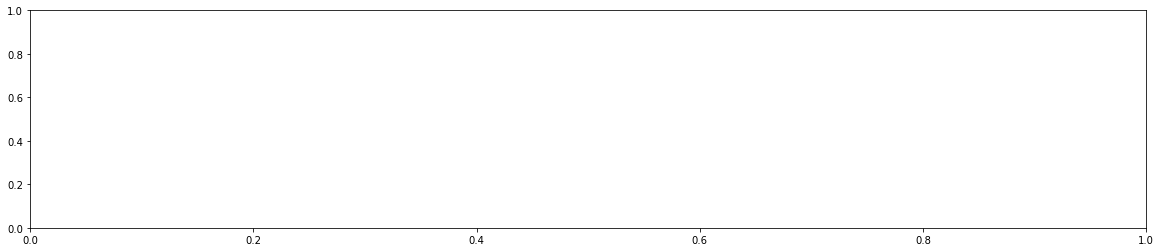

In [2]:
tsur, hsur = bhptsur.generate_surrogate(q=20.0, spin1=0.2, calibrated=False)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

In [10]:
# DEBUGGING
print(hsur[(2,2)])
print(tsur)

(0.22178867800227559+9.423562133750597e-12j)
{'negative_spin': array([-1.312464e+04, -1.312452e+04, -1.312440e+04, ..., -2.400000e-01,
       -1.200000e-01,  0.000000e+00]), 'positive_spin': array([-13002.240002, -13002.120002, -13002.000002, ...,    122.16    ,
          122.28    ,    122.4     ])}


In [11]:
#DEBUGGING
tsur

array({'negative_spin': array([-1.312464e+04, -1.312452e+04, -1.312440e+04, ..., -2.400000e-01,
       -1.200000e-01,  0.000000e+00]), 'positive_spin': array([-13002.240002, -13002.120002, -13002.000002, ...,    122.16    ,
          122.28    ,    122.4     ])}, dtype=object)

### 2. Generate NR-calibrated waveforms in geometric units

In [ ]:
tsur, hsur = bhptsur.generate_surrogate(q=20)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 3. Generate (NR calibrated) waveform modes in Physical (SI) units

In [ ]:
tsur, hsur = bhptsur.generate_surrogate(q=100, M_tot=60, dist_mpc=100)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [seconds]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 4. Generate (NR calibrated) waveform modes in Physical (SI) units evaluated at point on the sphere

In [ ]:
tsur, hsur = bhptsur.generate_surrogate(q=15, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

#### 4.1. Check for phase=0, inclination=0, 33 mode is zero

In [ ]:
tsur, hsur = bhptsur.generate_surrogate(q=8, M_tot=60, dist_mpc=100, orb_phase=0.0, inclination=0.0)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 5. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for a given set of modes

In [ ]:
# Note : (2,2) mode should always be in the mode_list; otherwise it will throw errors
modes = [(2,2),(3,3),(4,4),(5,5)]

tsur, hsur = bhptsur.generate_surrogate(q=8, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 6. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=3

In [ ]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=8, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 7. Generate mode-summed (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=5

In [ ]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=18, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3, mode_sum=True)


plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur), '-', label='real')
plt.plot(tsur, np.imag(hsur), '-', label='imag')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()